In [10]:
import pandas as pd
import numpy as np
import os
import plotly.offline as py
py.init_notebook_mode(connected=False)
import plotly.graph_objs as go
import json
import cufflinks as cf
import seaborn as sns
cf.set_config_file(offline=True)
import json
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_profiling
import requests

In [102]:
df = pd.read_csv('pokemon.csv')
df.head()

abilities  against_bug  against_dark  against_dragon  \
0  ['Overgrow', 'Chlorophyll']          1.0           1.0             1.0   
1  ['Overgrow', 'Chlorophyll']          1.0           1.0             1.0   
2  ['Overgrow', 'Chlorophyll']          1.0           1.0             1.0   
3     ['Blaze', 'Solar Power']          0.5           1.0             1.0   
4     ['Blaze', 'Solar Power']          0.5           1.0             1.0   

   against_electric  against_fairy  against_fight  against_fire  \
0               0.5            0.5            0.5           2.0   
1               0.5            0.5            0.5           2.0   
2               0.5            0.5            0.5           2.0   
3               1.0            0.5            1.0           0.5   
4               1.0            0.5            1.0           0.5   

   against_flying  against_ghost  ...  percentage_male  pokedex_number  \
0             2.0            1.0  ...             88.1               1   
1             2.0            1.0  ...             88.1               2   
2             2.0            1.0  ...             88.1               3   
3             1.0            1.0  ...             88.1               4   
4             1.0            1.0  ...             88.1               5   

   sp_attack  sp_defense  speed  type1   type2  weight_kg  generation  \
0         65          65     45  grass  poison        6.9           1   
1         80          80     60  grass  poison       13.0           1   
2        122         120     80  grass  poison      100.0           1   
3         60          50     65   fire     NaN        8.5           1   
4         80          65     80   fire     NaN       19.0           1   

   is_legendary  
0             0  
1             0  
2             0  
3             0  
4             0  

[5 rows x 41 columns]

In [103]:
df['weight_kg'].fillna(value=df['weight_kg'].mean(), inplace=True)

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
abilities            801 non-null object
against_bug          801 non-null float64
against_dark         801 non-null float64
against_dragon       801 non-null float64
against_electric     801 non-null float64
against_fairy        801 non-null float64
against_fight        801 non-null float64
against_fire         801 non-null float64
against_flying       801 non-null float64
against_ghost        801 non-null float64
against_grass        801 non-null float64
against_ground       801 non-null float64
against_ice          801 non-null float64
against_normal       801 non-null float64
against_poison       801 non-null float64
against_psychic      801 non-null float64
against_rock         801 non-null float64
against_steel        801 non-null float64
against_water        801 non-null float64
attack               801 non-null int64
base_egg_steps       801 non-null int64
base_happiness    

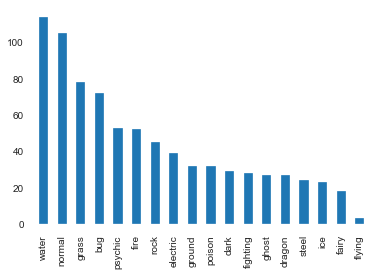

In [78]:
df.type1.value_counts().plot.bar()

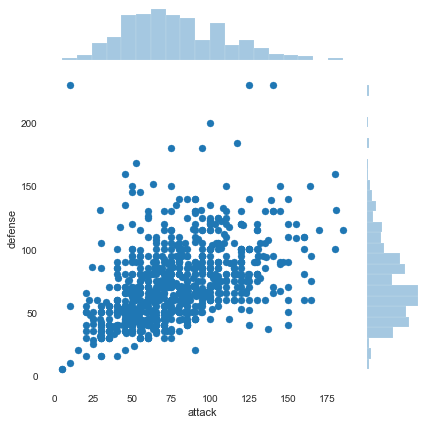

In [142]:
sns.jointplot(data=df, x='attack',y='defense',kind='scatter');

In [80]:
df.corr()

against_bug  against_dark  against_dragon  \
against_bug           1.000000      0.230107        0.165430   
against_dark          0.230107      1.000000        0.140830   
against_dragon        0.165430      0.140830        1.000000   
against_electric     -0.246943     -0.015830       -0.108928   
against_fairy         0.239566     -0.301354        0.439705   
against_fight         0.137902     -0.357981        0.035237   
against_fire          0.202778      0.010527       -0.261570   
against_flying        0.183343     -0.179697        0.064850   
against_ghost         0.129174      0.672337       -0.049941   
against_grass         0.079197     -0.006533       -0.037135   
against_ground       -0.186841     -0.007660       -0.120042   
against_ice           0.148176     -0.010763        0.350048   
against_normal        0.215589     -0.413632        0.142035   
against_poison        0.354255     -0.236919       -0.210199   
against_psychic      -0.463272     -0.230415        0.100153   
against_rock         -0.210522      0.011963        0.090184   
against_steel         0.055504     -0.119758       -0.227697   
against_water        -0.254732     -0.001976       -0.096549   
attack               -0.054175     -0.098849        0.138217   
base_egg_steps        0.062133      0.187220        0.164773   
base_happiness        0.009994      0.024155       -0.151915   
base_total           -0.012398      0.065446        0.069766   
defense              -0.036474      0.048039       -0.023794   
experience_growth     0.035717     -0.008391        0.172547   
height_m             -0.060858      0.019219        0.164464   
hp                    0.034897      0.010589        0.089721   
percentage_male      -0.048373     -0.097547        0.061785   
pokedex_number        0.004618      0.009066        0.000872   
sp_attack             0.055352      0.170849        0.039739   
sp_defense           -0.002342      0.132507       -0.047416   
speed                -0.043802     -0.000326        0.078123   
weight_kg            -0.031344      0.037634        0.125991   
generation           -0.001549     -0.016013       -0.025201   
is_legendary          0.027864      0.136315        0.014844   

                   against_electric  against_fairy  against_fight  \
against_bug               -0.246943       0.239566       0.137902   
against_dark              -0.015830      -0.301354      -0.357981   
against_dragon            -0.108928       0.439705       0.035237   
against_electric           1.000000      -0.089864      -0.102798   
against_fairy             -0.089864       1.000000       0.157712   
against_fight             -0.102798       0.157712       1.000000   
against_fire              -0.279029      -0.169489      -0.076480   
against_flying            -0.111461       0.199862      -0.318941   
against_ghost             -0.073031      -0.120806      -0.546982   
against_grass              0.056209       0.052899       0.269157   
against_ground            -0.269444      -0.256504       0.358793   
against_ice               -0.328531       0.273650      -0.220239   
against_normal             0.076699       0.149488      -0.006997   
against_poison            -0.015769       0.146464      -0.189798   
against_psychic           -0.017592      -0.145238      -0.264938   
against_rock               0.417261      -0.205444      -0.240964   
against_steel             -0.187543       0.130323       0.165066   
against_water             -0.297600      -0.218937       0.205249   
attack                    -0.104276       0.207526       0.149123   
base_egg_steps            -0.061970       0.120594      -0.006359   
base_happiness             0.030411      -0.209323      -0.088722   
base_total                -0.017137       0.098948       0.048629   
defense                   -0.072433       0.001655       0.150424   
experience_growth         -0.041584       0.146370       0.010407   
height_m                   0.003068       0.115360   

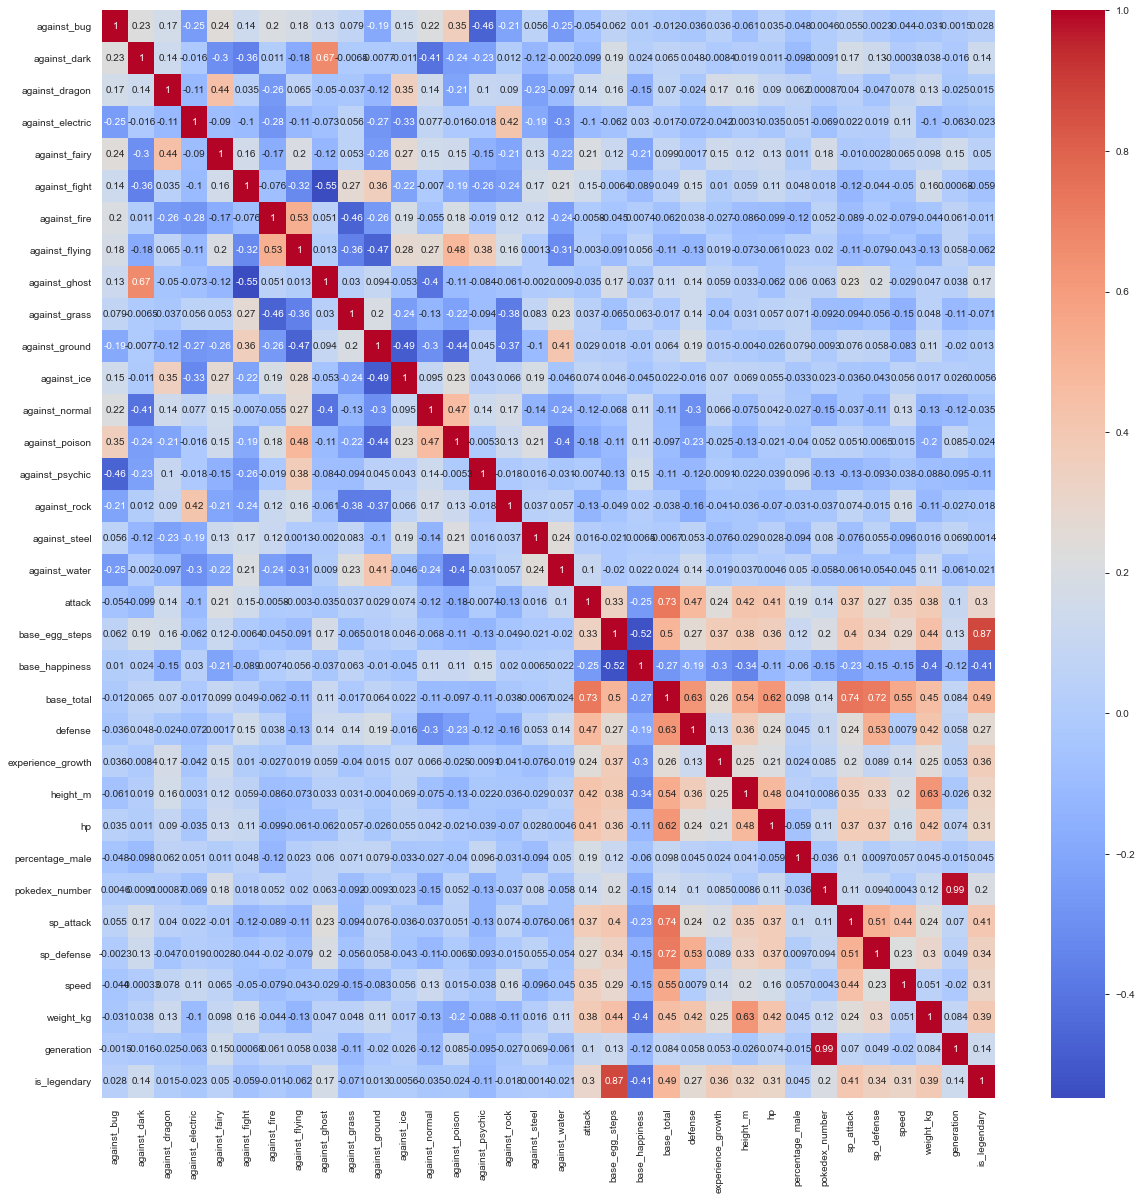

In [81]:
ax = plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), cmap='coolwarm',annot=True)

<Figure size 1440x1440 with 0 Axes>

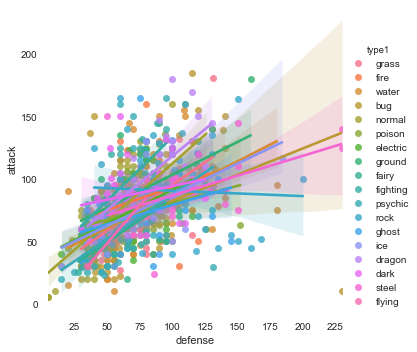

In [82]:
ax = plt.figure(figsize=(20,20))
sns.lmplot(data=df, x='defense', y='attack', hue='type1');

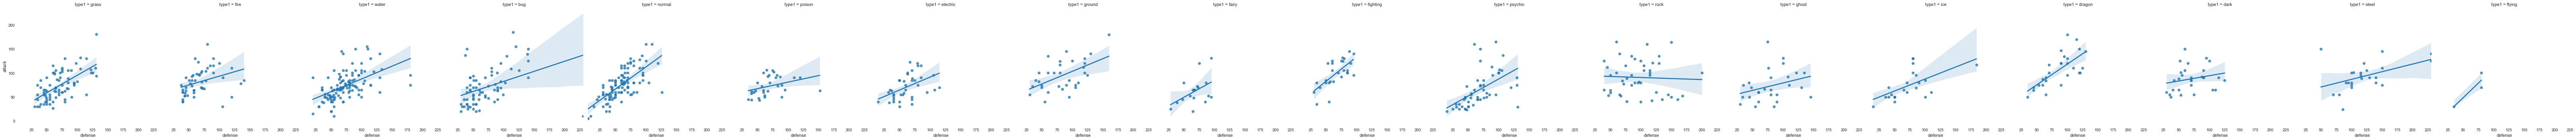

In [83]:
sns.lmplot(x='defense',y='attack',data=df,col='type1')

In [84]:
df['is_legendary']

0      0
1      0
2      0
3      0
4      0
      ..
796    1
797    1
798    1
799    1
800    1
Name: is_legendary, Length: 801, dtype: int64

In [85]:
legendary = df.loc[df['is_legendary'] == 1]

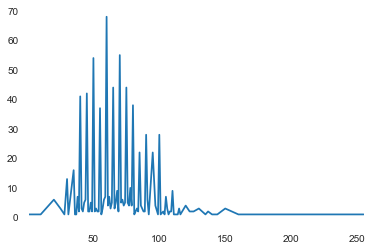

In [86]:
df.hp.value_counts().sort_index().plot.line()

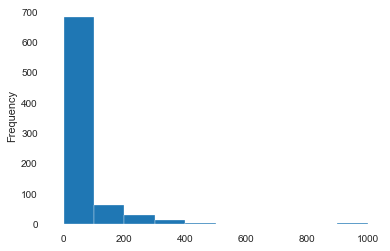

In [87]:
df.weight_kg.plot.hist()

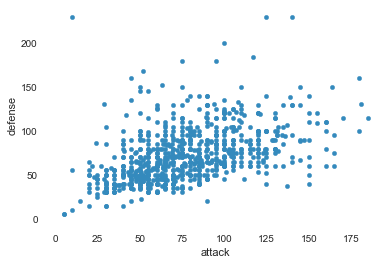

In [88]:
df.plot.scatter(x='attack', y='defense');

In [89]:
df3 = pd.DataFrame({'attack':df['attack'],'weight':df['weight_kg'],'defense':df['defense']})
df3

attack  weight  defense
0        49     6.9       49
1        62    13.0       63
2       100   100.0      123
3        52     8.5       43
4        64    19.0       58
..      ...     ...      ...
796     101   999.9      103
797     181     0.1      131
798     101   888.0       53
799     107   230.0      101
800      95    80.5      115

[801 rows x 3 columns]

In [93]:
df3.iplot(kind='surface',colorscale='rdylbu')

In [97]:
import plotly.express as px

In [105]:
fig = px.scatter_3d(df, x='attack', y='defense', z='hp', size='weight_kg', color='weight_kg',
                    hover_data=['name'])
fig.update_layout(scene_zaxis_type="log")
fig.show()

In [108]:
df.iplot(kind='bubble',x='attack',y='defense',size='weight_kg')

<Figure size 1800x1800 with 0 Axes>

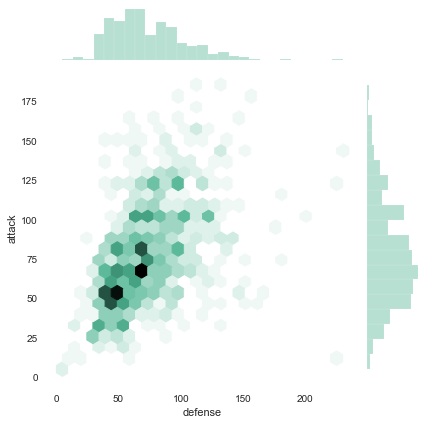

In [118]:
ax = plt.figure(figsize=(25,25));
sns.jointplot(data=df, x='defense', y='attack', kind="hex", color="#4CB391");

In [128]:
legend_attack_defense = df.groupby(['is_legendary', 'generation']).mean()[['attack', 'defense']]
legend_attack_defense

attack     defense
is_legendary generation                        
0            1            73.486301   69.431507
             2            68.095745   70.042553
             3            74.080000   68.768000
             4            79.234043   72.382979
             5            77.608392   70.000000
             6            71.484848   71.136364
             7            80.238095   74.539683
1            1           105.000000   89.000000
             2            99.166667   99.166667
             3           116.000000  121.000000
             4           107.538462  103.538462
             5           113.000000   93.538462
             6           132.000000  100.166667
             7           100.941176   90.882353

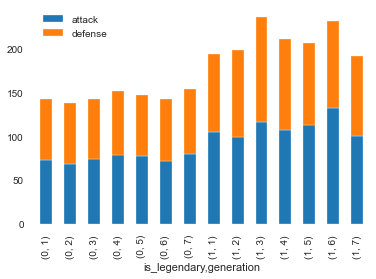

In [133]:
legend_attack_defense.plot.bar(stacked=True);

In [136]:
generation_stats = df.groupby(['generation']).mean()[['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']]

In [137]:
generation_stats.iplot(kind='line')

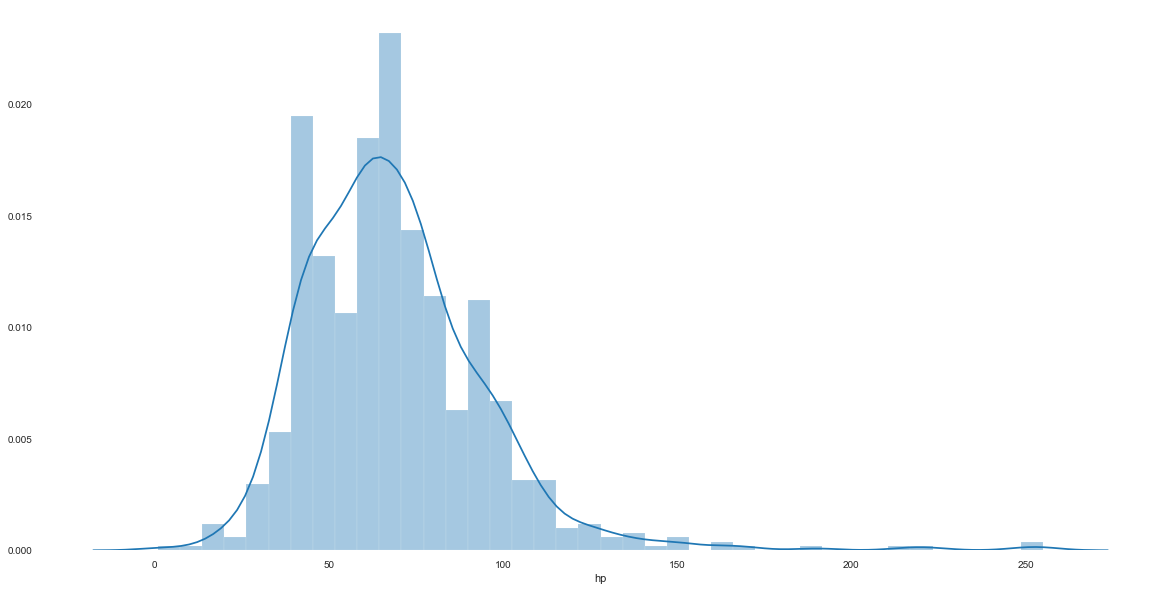

In [182]:
ax = plt.figure(figsize=(20,10))
sns.distplot(df.hp)

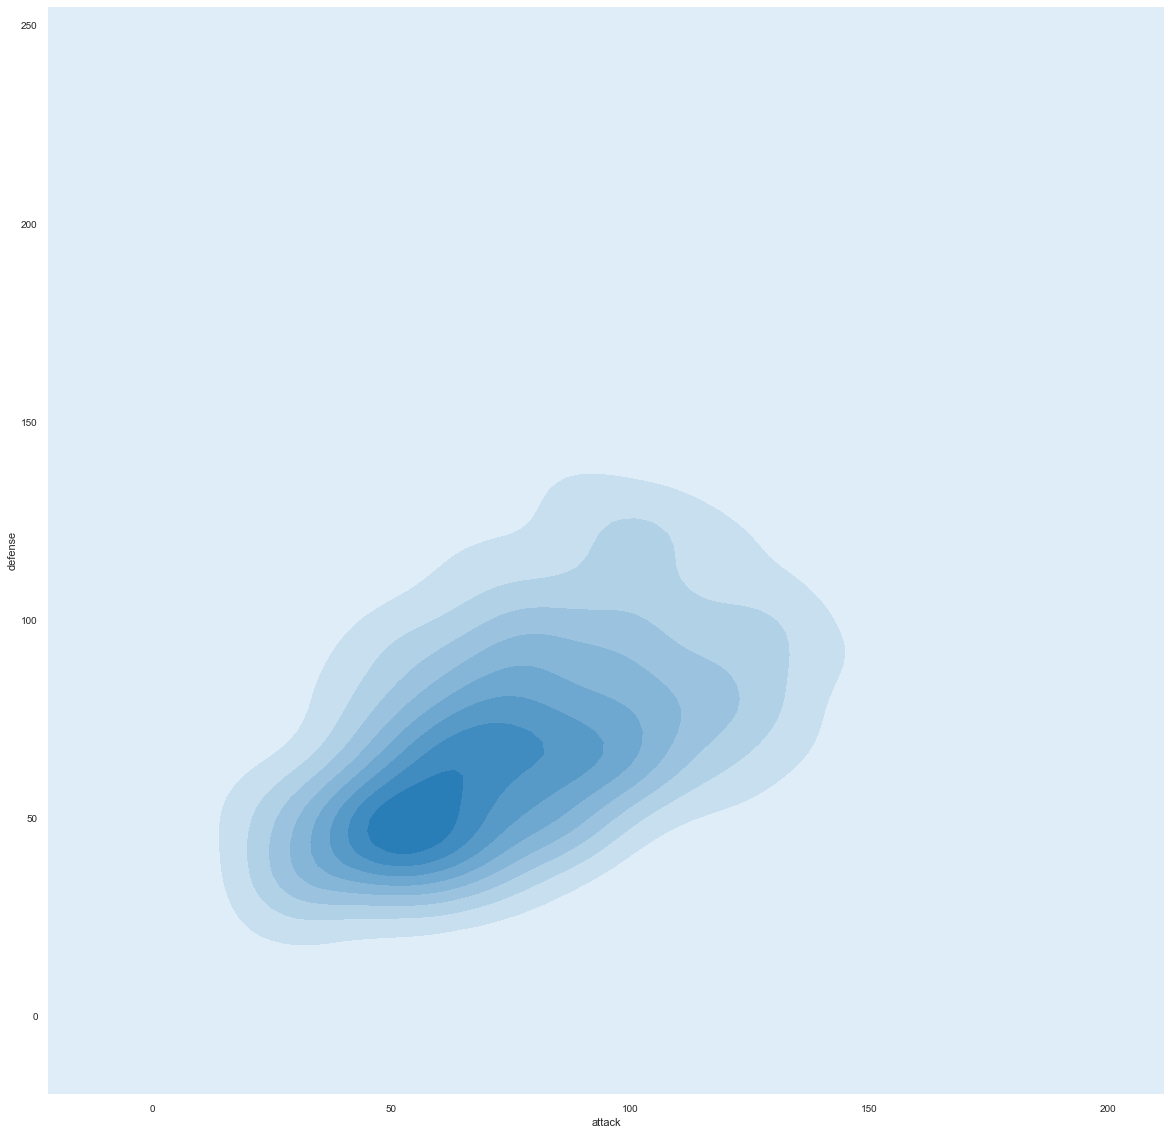

In [180]:
ax = plt.figure(figsize=(20,20))
sns.kdeplot(df.attack, df['defense'], shade=True);

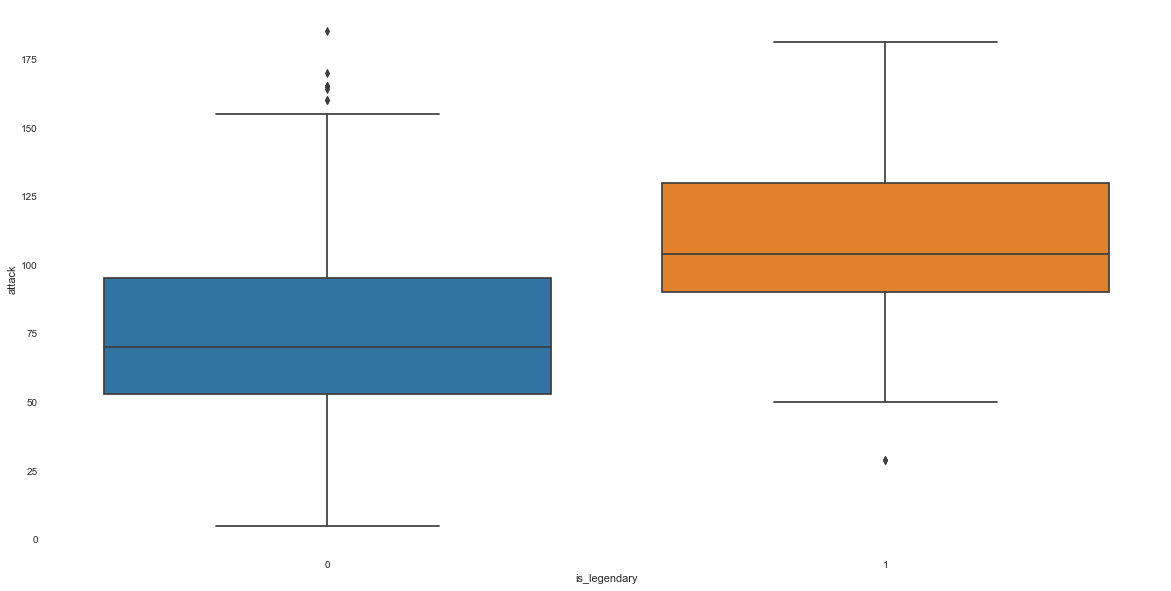

In [179]:
ax = plt.figure(figsize=(20,10))
sns.boxplot(x=df['is_legendary'], y=df['attack']);

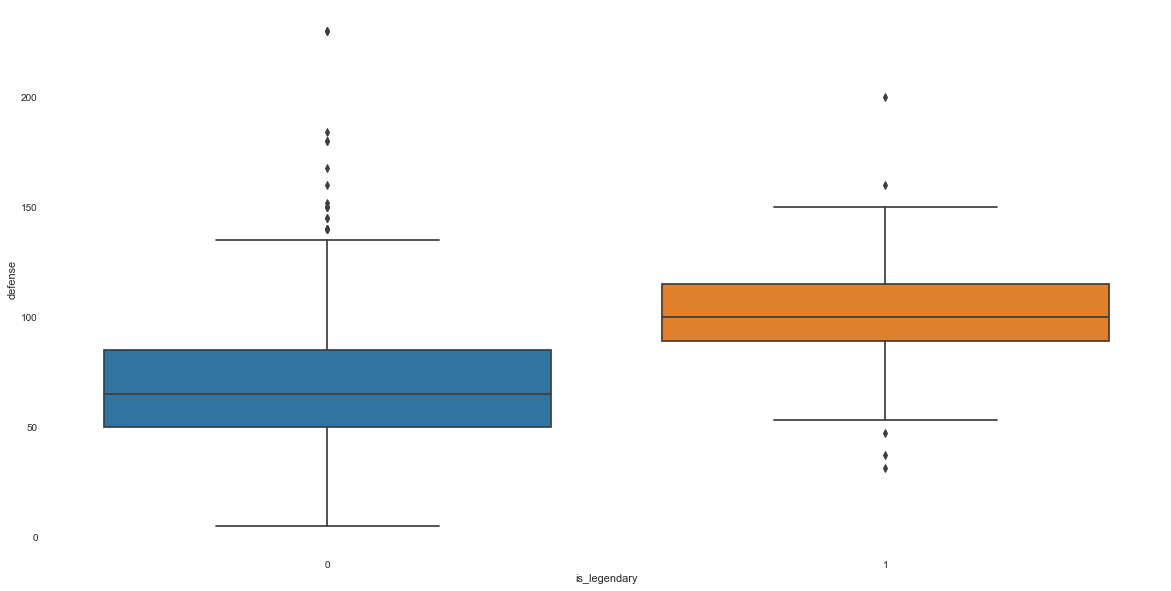

In [176]:
ax = plt.figure(figsize=(20,10))
sns.boxplot(x=df['is_legendary'], y=df['defense']);

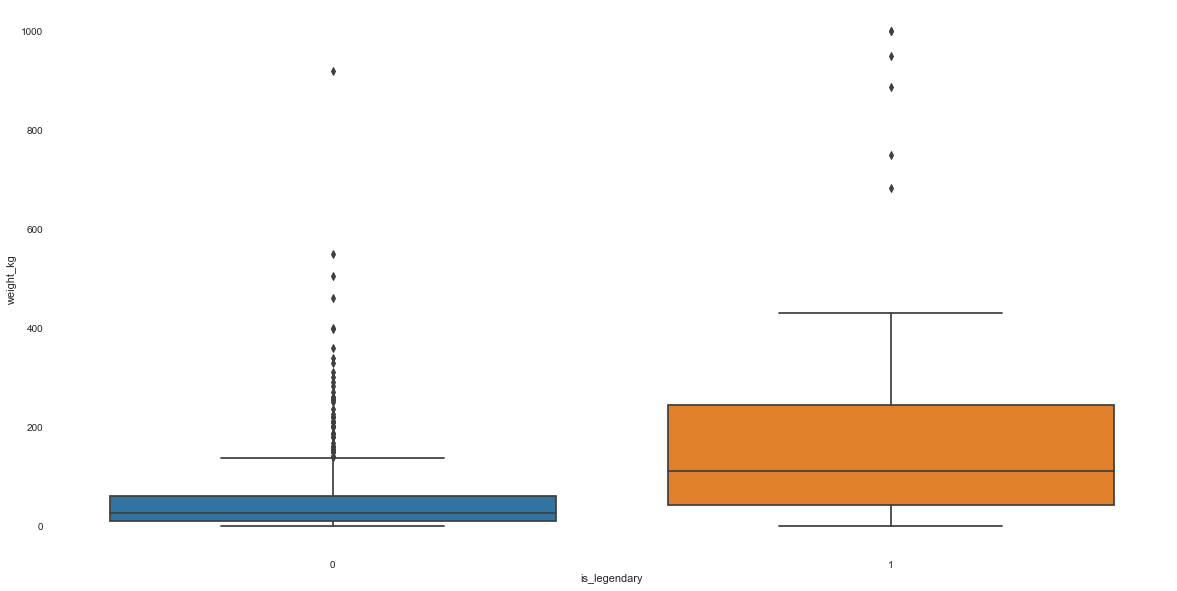

In [177]:
ax = plt.figure(figsize=(20,10))
sns.boxplot(x=df['is_legendary'], y=df['weight_kg']);

<Figure size 1440x1440 with 0 Axes>

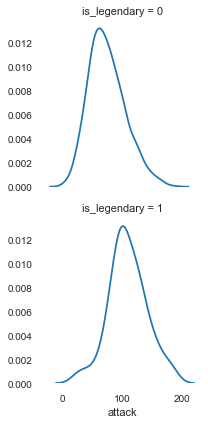

In [178]:
ax = plt.figure(figsize=(20,20))
facetgrid = sns.FacetGrid(df, row='is_legendary');
facetgrid.map(sns.kdeplot, 'attack');

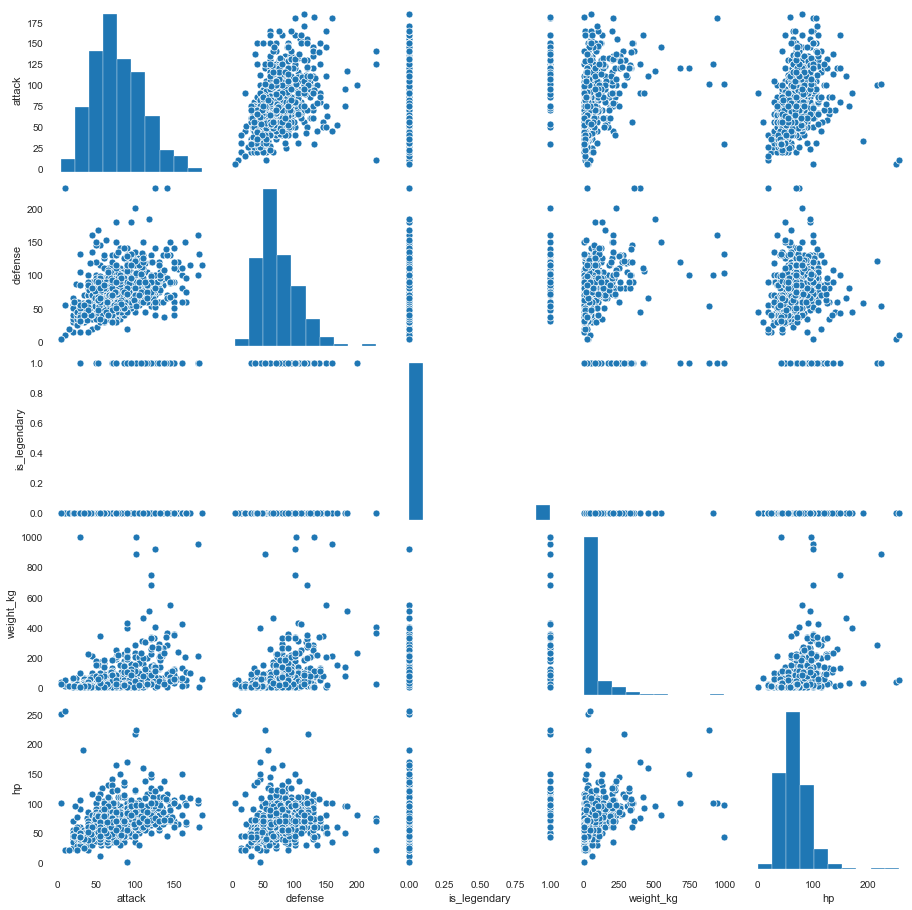

In [152]:
sns.pairplot(df[['attack', 'defense', 'is_legendary', 'weight_kg', 'hp']])

<Figure size 1440x1440 with 0 Axes>

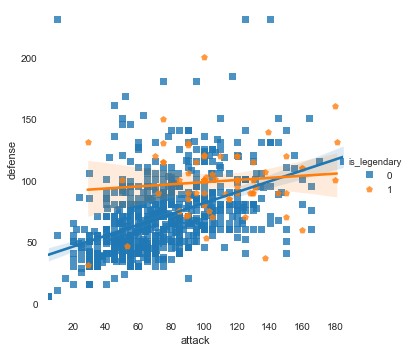

In [171]:
ax = plt.figure(figsize=(20,20))
sns.lmplot(data=df, x='attack', y='defense', hue='is_legendary', markers=[',', 'p']);

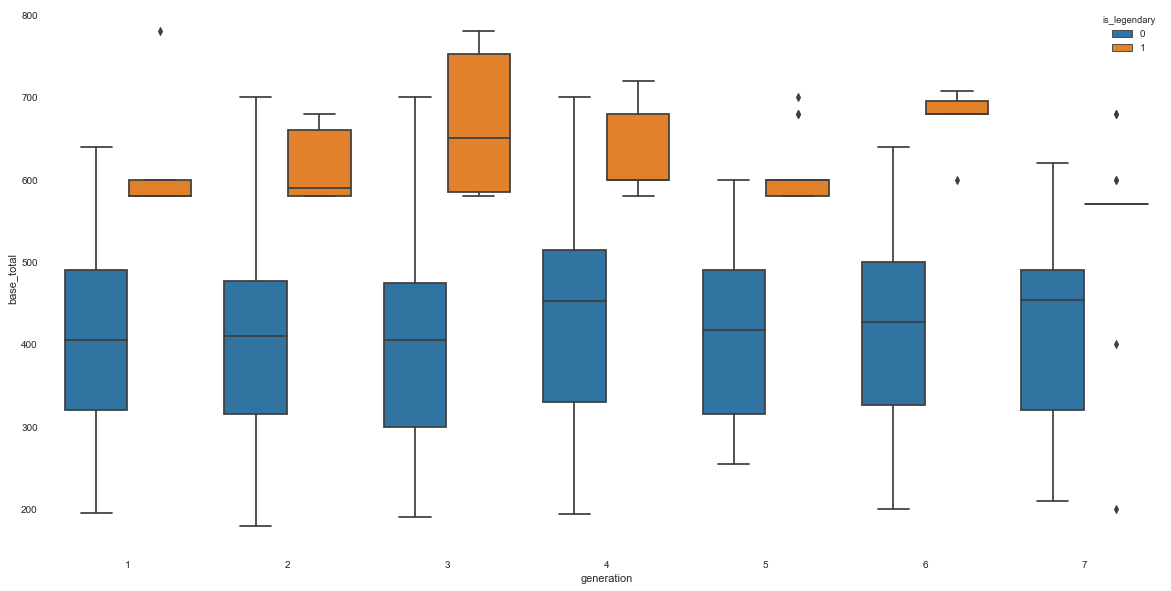

In [183]:
ax = plt.figure(figsize=(20,10))
sns.boxplot(x='generation', y='base_total', hue='is_legendary', data=df);